# Exercise 18

## Analyze class homeworks


In [3]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, BaggingClassifier
from sklearn.metrics import r2_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, svm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk import word_tokenize,sent_tokenize

import pickle

from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [5]:
data.describe()

,Sexo,T1,T2,T3,T4,T5,T6
count,42,41,30,30,36,35,29
unique,2,41,30,30,36,35,29
top,H,Los algoritmos de machine learning buscan pred...,Tipos de machine learning: Supervised Machine ...,Los tipos de algoritmos y aplicaciones de árbo...,‘Ensembling’ es una estrategia exitosa en mach...,El paper publicado en 2014 hace una evaluación...,"Antes de indicar las diferen cias, se debe acl..."
freq,34,1,1,1,1,1,1


In [6]:
#Primero hacemos un tratamiento de los NAN values para poder analizar los textos
data = data.replace(np.nan, 'empty', regex=True)

In [7]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,empty,Los árboles de decisión es uno de los algoritm...,empty,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,empty,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,empty
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [8]:
#Concatenamos todos los textos para evaluar patrones

data['All_text'] = data['T1']+" "+data['T2']+" "+data['T3']+" "+data['T4']+" "+data['T5']+" "+data['T6']
data[['Sexo','All_text']].head()

,Sexo,All_text
0,H,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...
4,H,Python vs R para análisis de datos. A pesar de...


In [9]:
cadena=data.iloc[0,5]
print(cadena)

En el documento "Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?" los autores evalúan 179 clasificadores, de 17 familias y en 121 bases de datos, implementados en Weka, R, C/C++ y Matlab, con el fin de determinar cuáles clasificadores tienen mejor rendimiento. Para llevar a cabo esta tarea, los autores generan el training y el test set de forma aleatoria. Luego, los parámetros son ajustados, seleccionando aquellos que proporcionan la mejor precisión en el train set. Posteriormente, llevan a cabo una 4-fold cross validation utilizando toda la base de datos. Por otro lado, como medidas de rendimiento de los clasificadores los autores utilizaron el average accuracy, el Friedman ranking y el Cohen k. Estos concluyen que los mejores clasificadores son los Bosques Aleatorios, seguidos por las Máquinas de Vectores de Soporte. Dentro de los 25 mejores clasificadores, los mejores son los bosques aleatorios implementados en Caret, librería del software R, y que re

In [10]:
freq=str(len(cadena.split(" ")))
print(freq)

518


In [15]:
data['Freq_word']=data.apply(lambda x: str(len(x['All_text'].split(" "))), axis=1)
data[['All_text','Freq_word']].head()

,All_text,Freq_word
0,Un científico de datos y un ingeniero de datos...,1849
1,Aunque los dos perfiles cuentan con habilidade...,1325
2,Python vs Stata. Analizar información es un pr...,1772
3,Los algoritmos de machine learning buscan pred...,1470
4,Python vs R para análisis de datos. A pesar de...,1671


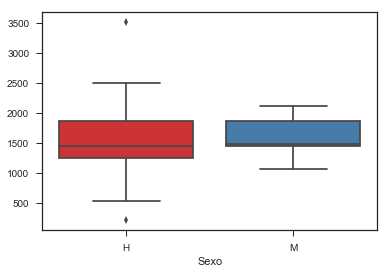

In [24]:
# library and dataset
import seaborn as sns
import numpy as np
y_text=np.array(data["Freq_word"]).astype(np.float)
# sns.boxplot(y=y_text) 
# Grouped boxplot
sns.boxplot(x=data["Sexo"], y=y_text, palette="Set1")
#sns.plt.show()


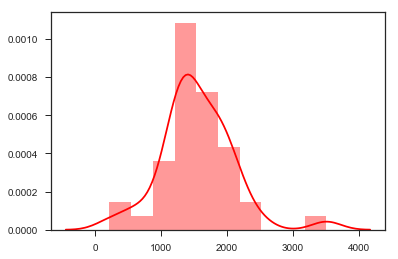

In [30]:
# Large bandwidth
sns.distplot(y_text, color="red")

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [33]:
# !pip install textdistance

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000001F8F733C748>, 'Connection to pypi.org timed out. (connect timeout=15)')': /simple/textdistance/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000001F8F733C470>, 'Connection to pypi.org timed out. (connect timeout=15)')': /simple/textdistance/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000001F8F733C630>, 'Connection to pypi.org timed out. (connect timeout=15)')': /simple/textdistance/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken b

In [34]:
import textdistance

In [74]:
def similarity(data):

    simil = pd.DataFrame(0, index=data.index, columns=data.index)
        
    for i in simil.index:    
        for j in simil.index:
            if i==j: simil.loc[j,i]=textdistance.hamming.normalized_similarity(data.All_text[i],data.All_text[j])*10
            if i!=j: simil.loc[j,i]=textdistance.hamming.normalized_similarity(data.All_text[i],data.All_text[j])*100
    assert simil.shape == (data.shape[0], data.shape[0])
    return simil

In [75]:
similarity(data)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,10.000000,4.737251,6.859953,5.876262,6.135128,4.987488,4.875313,6.117813,5.211839,7.074228,...,4.279921,7.397959,7.015273,5.298128,6.413724,5.196872,0.837001,6.201667,5.393045,5.436189
1,4.737251,10.000000,5.474025,6.221342,5.826664,6.605655,6.476593,4.715651,6.934178,5.467222,...,6.394462,5.382653,5.100450,6.616134,4.721428,4.248841,1.396222,4.955327,6.321962,7.942238
2,6.859953,5.474025,10.000000,6.446385,7.112632,5.086882,4.699739,6.611311,5.248942,6.487544,...,4.249572,6.760204,6.477312,5.474025,6.297813,5.487510,0.855316,6.216683,5.942199,5.582065
3,5.876262,6.221342,6.446385,10.000000,6.831934,5.533556,6.085869,5.451982,6.575657,5.739308,...,5.200083,6.062925,5.845168,6.721551,5.440074,4.712477,1.146311,5.601021,6.804919,6.231763
4,6.135128,5.826664,7.112632,6.831934,10.000000,5.816904,5.572907,6.344979,5.650986,6.096420,...,4.889713,6.241497,6.191548,6.246340,5.803261,5.072313,1.112629,5.473384,7.163771,5.973063
5,4.987488,6.605655,5.086882,5.533556,5.816904,10.000000,6.580247,3.979320,6.851742,4.838024,...,6.410419,4.515306,4.892622,5.619924,4.203694,3.626047,1.188519,4.136947,6.162047,6.509840
6,4.875313,6.476593,4.699739,6.085869,5.572907,6.580247,10.000000,4.504152,6.615475,4.361874,...,5.925926,4.957483,4.883963,6.085544,4.443242,3.944364,1.000000,4.099407,5.916844,6.207057
7,6.117813,4.715651,6.611311,5.451982,6.344979,3.979320,4.504152,10.000000,4.660818,6.274479,...,3.822654,6.438979,6.540812,5.193483,6.831002,6.470140,0.783331,7.035063,5.216983,4.496318
8,5.211839,6.934178,5.248942,6.575657,5.650986,6.851742,6.615475,4.660818,10.000000,4.974067,...,6.568222,5.255102,5.420852,6.497022,4.852793,4.248841,1.275842,4.166980,6.279318,7.208571
9,7.074228,5.467222,6.487544,5.739308,6.096420,4.838024,4.361874,6.274479,4.974067,10.000000,...,4.327863,7.150752,7.006207,5.900859,6.993277,6.387101,0.748236,6.652151,6.019896,5.688292


In [76]:
simil=similarity(data)

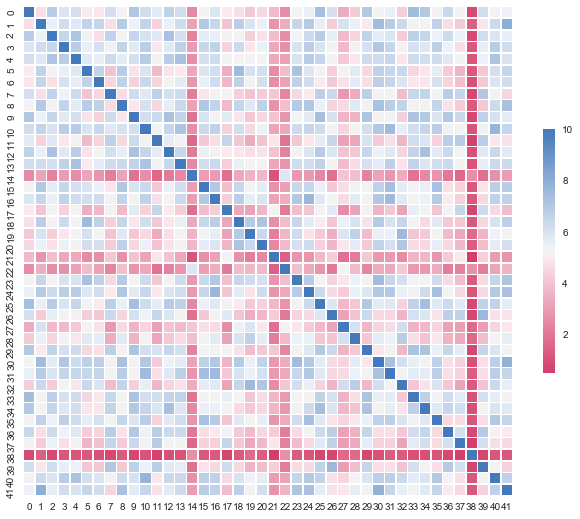

In [77]:
# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(0, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(simil, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Exercise 18.3

Create a classifier to predict the sex of each student



In [78]:
#Primero creamos una nueva variable binaria para el género
data['BiSexo'] = np.where(data['Sexo']=='H', 1, 0)
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,All_text,Freq_word,BiSexo
0,H,Un científico de datos y un ingeniero de datos...,empty,Los árboles de decisión es uno de los algoritm...,empty,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,1849,1
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,empty,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,1325,1
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,1772,1
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,empty,Los algoritmos de machine learning buscan pred...,1470,0
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...,1671,1


In [79]:
#Definimos X y y para el modelo y dividimos en train y test

X = data.drop(['Sexo','BiSexo'], axis=1)
y = data['BiSexo']



In [80]:
def tokenize_test(vect):
    X_vec = vect.fit_transform(data['All_text'])
    print('Features: ', X_vec.shape)
    return X_vec

In [81]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ivivger1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    #print(words)
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [83]:
vect = TfidfVectorizer(max_df=0.4,stop_words=['-','.'],ngram_range=(1, 3),analyzer=split_into_lemmas,norm='l1')

X_vec=tokenize_test(vect)

Features:  (42, 8063)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, random_state=42)

In [112]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=30,random_state=1))

In [113]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=1)

In [128]:
y_pred = clf.predict_proba(X_test)

In [129]:
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.iloc[:,0]

print(y_pred)

0     0.15
1     0.07
2     0.14
3     0.16
4     0.10
5     0.11
6     0.13
7     0.13
8     0.05
9     0.12
10    0.13
Name: 0, dtype: float64


In [130]:
print(y_test)

25    1
13    1
8     1
26    1
4     1
39    0
19    1
29    1
30    1
6     1
27    1
Name: BiSexo, dtype: int32


In [131]:
y_test.shape

(11,)

In [132]:
y_pred.shape

(11,)

In [133]:
roc_auc_score(y_test, y_pred, average='macro')

0.7